# **Recipe Visualization Application**




# Table of Contents

- [ 1 - Initial Setup & Data Preprocessing](#1)
  - [ 1.1 - Pulling Data from Kaggle and Basic File Reading](#1.1)
  - [ 1.2 - Handle Inconsistent & Duplicate Entries](#1.2)
  - [ 1.3 - Handle Missing Values](#1.3)
  - [ 1.4 - Feature Engineering](#1.4)
    - [ 1.4.1 - Handle Outliers](#1.4.1)
    - [ 1.4.2 - Feature Categorization](#1.4.2)
- [ 2 - Exploratory Data Analysis (EDA)](#2)
  - [ 2.1 - What are the most common ingredients in highly rated recipes?](#2.1)
  - [ 2.2 - Are there any correlations between preparation time and recipe ratings?](#2.2)
  - [ 2.3 - How can we recommend the top 10 quick, highly rated recipes that provide the best balance of high protein and calories?](#2.3)
  - [ 2.4 - How can the data help to improve the user experience for a recipe platform?](#2.4)
  - [ 2.5 - What types of recipes are low in calories/proteins/fat/sodium yet highly rated?](#2.5)
  - [ 2.6 - What types of recipes are highly rated in occasion like Cristmas?](#2.6)


  


<a name='1'></a>
## 1 - **Initial Setup & Data Preprocessing**

<a name='1.1'></a>
### 1.1 - Pulling Data from Kaggle and Basic File Reading

In [79]:
# import necessary libraries
import pandas as pd
import numpy as np
import zipfile
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [117]:
# Install Kaggle package
!pip install -q kaggle

In [118]:
# Move the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set the permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the EpiRecipes dataset from Kaggle
!kaggle datasets download -d hugodarwood/epirecipes

# Unzip the downloaded file
!unzip epirecipes.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/hugodarwood/epirecipes
License(s): unknown
 98% 11.0M/11.3M [00:00<00:00, 89.0MB/s]
100% 11.3M/11.3M [00:00<00:00, 90.3MB/s]
Archive:  epirecipes.zip
  inflating: epi_r.csv               
  inflating: full_format_recipes.json  
  inflating: recipe.py               
  inflating: utils.py                


In [81]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [119]:
# Load the provided files along with the embeddings
file = 'epi_r.csv'

# Load the data
df = pd.read_csv(file)

In [120]:
# Display the first 2 rows of df
df.head(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

In [84]:
# Print the dimensions (rows, columns) of the DataFrame 'df'
print(f'The DataFrame "df" has: {df.shape[0]} rows and {df.shape[1]} columns.')

# New line
print('\n')

# Show df info (types, non-null counts)
df.info()

The DataFrame "df" has: 20052 rows and 680 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


<a name='1.2'></a>
### 1.2 - Handle Inconsistent & Duplicate Entries

In [85]:
# Convert all string values in DataFrame to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


<ipython-input-85-a9ef8f68533b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [86]:
# Count total duplicate rows in the dataset
print("Total duplicate rows in the dataset :", df.duplicated().sum())

Total duplicate rows in the dataset : 1801


In [87]:
#Drop the duplicate rows and reset the index
df.drop_duplicates(inplace=True)
df.reset_index(drop = True, inplace=True)

In [88]:
# Print the dimensions (rows, columns) of the DataFrame 'df'
print(f'The DataFrame "df" has: {df.shape[0]} rows and {df.shape[1]} columns.')

# New line
print('\n')

# Show df info (types, non-null counts)
df.info()

The DataFrame "df" has: 18251 rows and 680 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18251 entries, 0 to 18250
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 94.7+ MB


In [89]:
# Get columns with 2 unique values
unique_value_columns = df.nunique()

# Filter columns that have exactly 2 unique values
two_unique_columns = unique_value_columns[unique_value_columns == 2]

# Create a DataFrame to display column names and their two unique values
two_unique_columns_df = pd.DataFrame({
    'Column': two_unique_columns.index,
    'UniqueValue_1': [df[col].unique()[0] for col in two_unique_columns.index],
    'UniqueValue_2': [df[col].unique()[1] for col in two_unique_columns.index]
})

In [90]:
# Display the result
two_unique_columns_df.head()

,Column,UniqueValue_1,UniqueValue_2
0,#cakeweek,0.00,1.00
1,#wasteless,0.00,1.00
2,22-minute meals,0.00,1.00
3,3-ingredient recipes,0.00,1.00
4,30 days of groceries,0.00,1.00


In [91]:
# Print the dimensions (rows, columns) of the DataFrame 'two_unique_columns_df'
print(f'There are {two_unique_columns_df.shape[0]} columns with binary values.')

There are 674 columns with binary values.


In [92]:
# Filter columns that have non-binary
float_columns = unique_value_columns[unique_value_columns > 2]

# Create a DataFrame with 'columns' and 'Unique_values'
float_columns_df = pd.DataFrame({
    'columns': float_columns.index,
    'Unique_values': float_columns.values
})

In [93]:
# Display the columns with number of unique values
float_columns_df

,columns,Unique_values
0,title,17733
1,rating,8
2,calories,1858
3,protein,282
4,fat,326
5,sodium,2434


In [94]:
# Checking for negative entries using .lt(0) for each column and printing the count
for column in ['calories', 'protein', 'fat', 'sodium']:
    negative_count = df[column].lt(0).sum()

    print(f"The column '{column}' has {negative_count} incorrect entries")


The column 'calories' has 0 incorrect entries
The column 'protein' has 0 incorrect entries
The column 'fat' has 0 incorrect entries
The column 'sodium' has 0 incorrect entries


<a name='1.3'></a>
### 1.3 - Handle Missing Values

In [95]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display column names and their missing value percentages
missing_columns_df = pd.DataFrame({'Column': df.columns, 'Missing_Percentage': missing_percentage})

# Filter to show only columns where the missing percentage is greater than 0
missing_columns_df = missing_columns_df[missing_columns_df['Missing_Percentage'] > 0]

# Add a percentage sign to each value in 'MissingPercentage'
missing_columns_df['Missing_Percentage'] = missing_columns_df['Missing_Percentage'].apply(lambda x: f'{x:.2f}%')

# Reset the index to avoid using column names as indexes
missing_columns_df.reset_index(drop=True, inplace=True)

# Display the result
missing_columns_df

,Column,Missing_Percentage
0,calories,20.54%
1,protein,20.72%
2,fat,20.83%
3,sodium,20.55%


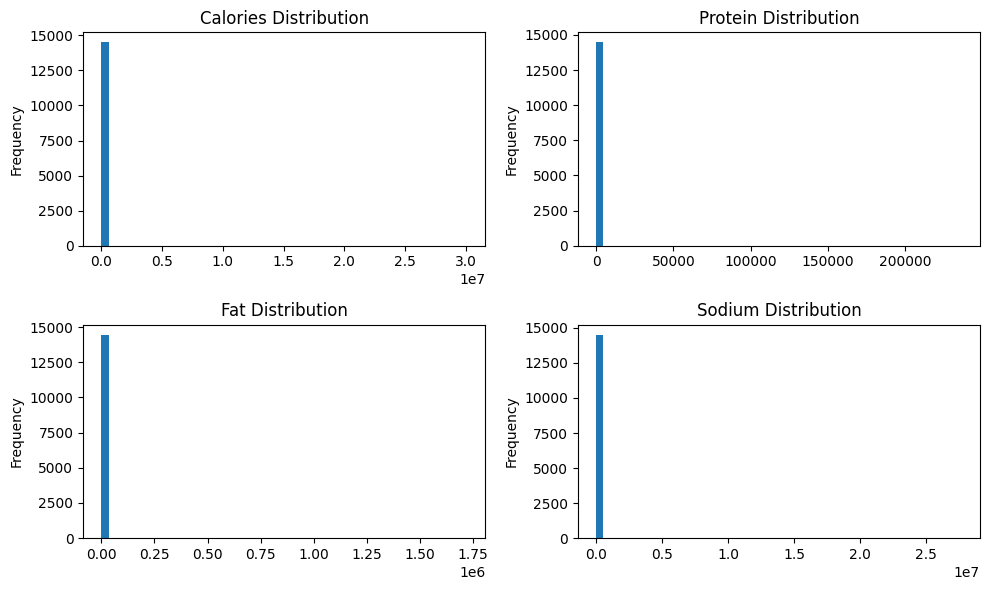

In [96]:
# Plot the distributions of the original columns
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

df['calories'].plot(kind='hist', bins=50, ax=axes[0, 0], title='Calories Distribution')
df['protein'].plot(kind='hist', bins=50, ax=axes[0, 1], title='Protein Distribution')
df['fat'].plot(kind='hist', bins=50, ax=axes[1, 0], title='Fat Distribution')
df['sodium'].plot(kind='hist', bins=50, ax=axes[1, 1], title='Sodium Distribution')

plt.tight_layout()
plt.show()

*Clearly we can see a single bar around 0 in each distributions, so it is obvious that these columns has right skewed distribution. Let's see their statistics:*

In [97]:
# Set the display options to show numbers in fixed point format
pd.set_option('display.float_format', '{:.2f}'.format)

# Now, when you call describe, the numbers will be shown in fixed point format
df[['calories', 'protein', 'fat', 'sodium']].describe()

,calories,protein,fat,sodium
count,14502.00,14470.00,14450.00,14501.00
mean,6622.10,92.23,363.39,6573.83
std,374781.93,3511.76,21357.70,348417.23
min,0.00,0.00,0.00,0.00
25%,205.00,3.00,8.00,88.00
50%,345.00,9.00,18.00,304.00
75%,599.00,28.00,34.00,732.00
max,30111218.00,236489.00,1722763.00,27675110.00


*Now, the median is less sensitive to outliers, better for skewed distributions, and maintains a more realistic distribution compared to the mean. So median is a good choice to fill the missing values in this dataset. Let's check the correlation between these features:*

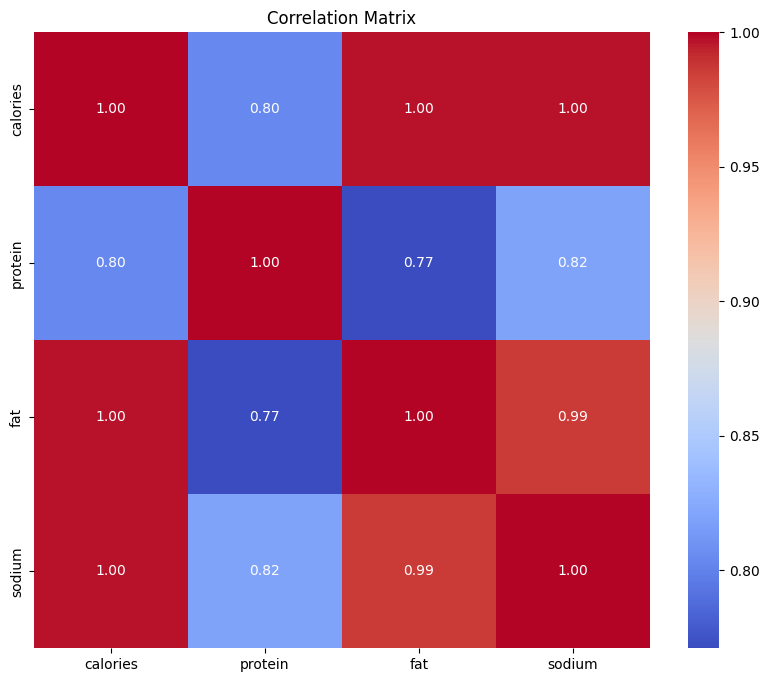

In [98]:
# Calculate the correlation matrix
correlation_matrix = df[['calories', 'protein', 'fat', 'sodium']].corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.title('Correlation Matrix')
plt.show()


In [99]:
# Get the list of columns with missing values
columns_with_missing = missing_columns_df['Column'].tolist()

# Calculate the percentage of rows where all specified columns have missing values
percentage_with_all_missing = (df[columns_with_missing].isnull().all(axis=1).sum() / len(df)) * 100

# Add this percentage to the missing_columns_df DataFrame
missing_columns_df['All_Missing_Percentage'] = f'{percentage_with_all_missing:.2f}%'

# Display the updated DataFrame
missing_columns_df


,Column,Missing_Percentage,All_Missing_Percentage
0,calories,20.54%,20.54%
1,protein,20.72%,20.54%
2,fat,20.83%,20.54%
3,sodium,20.55%,20.54%


*The correlation matrix shows that most features have over 99% correlation, making dependency-based imputation suitable for filling missing values. However, since nearly every row contains missing data, we can use the median, as noted earlier, to impute the values.*

In [100]:
# Fill missing values in calories with the median
median_calories = df['calories'].median()
df['calories'].fillna(median_calories, inplace=True)

# Fill missing values in protein with the median
median_protein = df['protein'].median()
df['protein'].fillna(median_protein, inplace=True)

# Fill missing values in fat with the median
median_fat = df['fat'].median()
df['fat'].fillna(median_fat, inplace=True)

# Fill missing values in sodium with the median
median_sodium = df['sodium'].median()
df['sodium'].fillna(median_sodium, inplace=True)

# Verify if missing values are filled
print("Total missing values in the column `calories`:", df['calories'].isnull().sum())

print("Total missing values in the column `protein`:", df['protein'].isnull().sum())

# Verify if missing values are filled
print("Total missing values in the column `fat`:", df['fat'].isnull().sum())

# Verify if missing values are filled
print("Total missing values in the column `sodium`:", df['sodium'].isnull().sum())

Total missing values in the column `calories`: 0
Total missing values in the column `protein`: 0
Total missing values in the column `fat`: 0
Total missing values in the column `sodium`: 0


<a name='1.4'></a>
### 1.4 - Feature Engineering

<a name='1.4.1'></a>
#### 1.4.1 - Handle Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


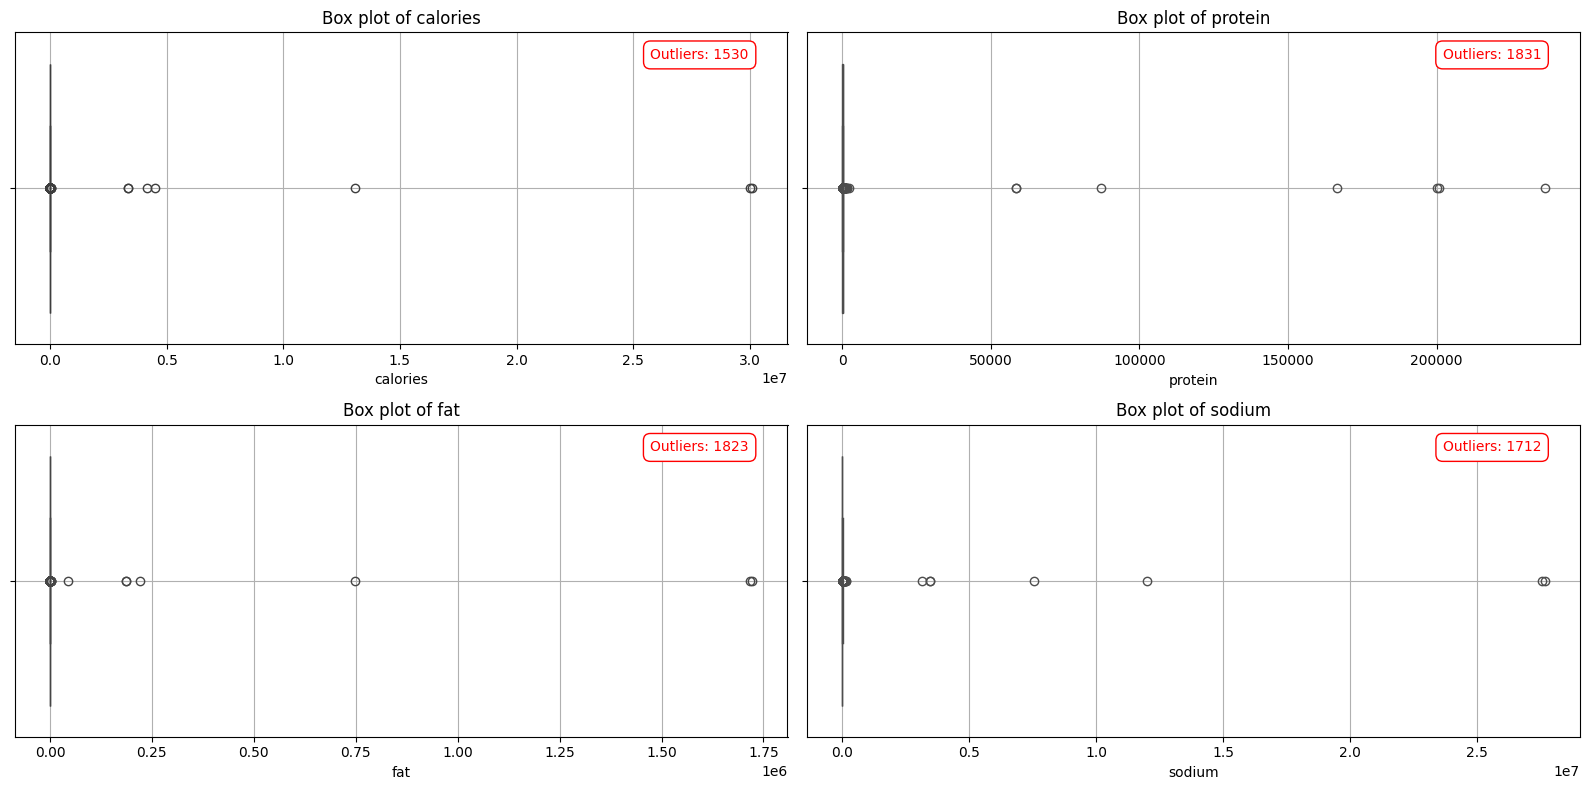

In [101]:
# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# List of numerical columns to check for outliers
numerical_cols = ['calories', 'protein', 'fat', 'sodium']

# Set custom RGB colors
colors = [(0.2, 0.4, 0.6), (0.7, 0.3, 0.5), (0.3, 0.6, 0.3), (0.8, 0.5, 0.2)]  # RGB tuples for custom colors

# Define the number of columns for subplots (2 plots per row)
n_cols = 2  # Number of plots per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots with smaller size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))  # Adjust the figure size accordingly
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot box plots for each numerical column with custom colors and display outlier counts
for i, col in enumerate(numerical_cols):
    # Box plot
    sns.boxplot(data=df, x=col, color=colors[i], ax=axes[i])  # Use specific subplot axis
    axes[i].set_title(f'Box plot of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].grid(True)

    # Detect outliers using IQR
    outliers = detect_outliers_iqr(df[col])
    outlier_count = len(outliers)

    # Display the number of outliers as text next to the box plot
    axes[i].text(0.95, 0.95, f'Outliers: {outlier_count}',
                 horizontalalignment='right', verticalalignment='top',
                 transform=axes[i].transAxes, fontsize=10, color='red',
                 bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [102]:
# Function to apply Winsorizing (capping) on a column and return the capped values
def apply_winsorizing(df, column, lower_percentile, upper_percentile):
    # Applying winsorization to the data
    winsorized_data = mstats.winsorize(df[column], limits=(lower_percentile, upper_percentile))
    # Creating a new column with winsorized values
    new_column_name = f"{column}_winsorized"
    df[new_column_name] = winsorized_data
    return df

# Defining the 1st and 99th percentile limits for Winsorizing (0.01 means 1%, 0.99 means 99%)
lower_limit = 0.01
upper_limit = 0.01

# List of columns to apply Winsorizing
columns_to_fill = ['calories', 'protein', 'fat', 'sodium']

# Applying Winsorizing to the selected columns and creating new columns
for column in columns_to_fill:
    df = apply_winsorizing(df, column, lower_limit, upper_limit)


------------------------

- We identified outliers in key columns (`calories`, `protein`, `fat`, `sodium`) and applied **Winsorizing** to cap extreme values. This method ensures that we retain all recipes, including unique or indulgent ones, without letting rare, extreme values skew our overall analysis.
- Winsorizing was chosen because it allows us to keep outlier recipes (which may still represent valuable insights, like high-calorie or high-protein meals) while reducing their impact on patterns like correlations or trends, making our analysis more reliable.
- New columns (e.g., `calories_winsorized`, `protein_winsorized`) were created so we can flexibly use the adjusted data for analyses such as identifying common ingredients in high-rated recipes, while still retaining original data for other specific insights, such as niche recipe offerings.

------------------------

In [103]:
df[['calories_winsorized', 'protein_winsorized', 'fat_winsorized', 'sodium_winsorized']].describe()

,calories_winsorized,protein_winsorized,fat_winsorized,sodium_winsorized
count,18251.00,18251.00,18251.00,18251.00
mean,454.70,18.21,25.34,522.96
std,413.86,25.39,28.58,732.05
min,24.00,0.00,0.00,2.00
25%,238.00,4.00,11.00,132.00
50%,345.00,9.00,18.00,304.00
75%,516.50,21.00,28.00,589.00
max,2785.00,153.00,188.00,4830.00


In [104]:
df[['calories', 'protein', 'fat', 'sodium']].describe()

,calories,protein,fat,sodium
count,18251.00,18251.00,18251.00,18251.00
mean,5332.70,74.99,291.46,5285.58
std,334086.32,3127.07,19004.39,310575.10
min,0.00,0.00,0.00,0.00
25%,238.00,4.00,11.00,132.00
50%,345.00,9.00,18.00,304.00
75%,516.50,21.00,28.00,589.00
max,30111218.00,236489.00,1722763.00,27675110.00


In [105]:
# Print the dimensions (rows, columns) of the DataFrame 'df'
print(f'The DataFrame "df" has: {df.shape[0]} rows and {df.shape[1]} columns.')

The DataFrame "df" has: 18251 rows and 684 columns.


<a name='1.4.2'></a>
#### 1.4.2 - Feature Categorization

In [106]:
Final_Categories = {

    "Recipe Information": ['title', 'rating', 'calories', 'protein', 'fat', 'sodium', 'calories_winsorized', 'protein_winsorized', 'fat_winsorized', 'sodium_winsorized'],

    "Ingredients": ['almond', 'anchovy', 'anise', 'apple', 'apple juice', 'apricot', 'artichoke', 'arugula', 'asparagus', 'avocado', 'bacon', 'barley', 'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'banana', 'beet', 'bell pepper', 'berry', 'blackberry', 'blue cheese', 'blueberry', 'bok choy', 'bran', 'bread', 'breadcrumbs', 'brie', 'brisket', 'broccoli', 'broccoli rabe', 'brown rice', 'brownie', 'butter', 'buttermilk', 'butternut squash', 'cabbage', 'cake', 'bulgur', 'burrito', 'canada', 'candy', 'cantaloupe', 'capers', 'caraway', 'cardamom', 'carrot', 'cashew', 'casserole/gratin', 'cauliflower', 'caviar', 'celery', 'chard', 'cheddar', 'cheese', 'cherry', 'chestnut', 'chicken', 'chickpea', 'chile', 'chile pepper', 'chili', 'chive', 'cilantro', 'cinnamon', 'citrus', 'clam', 'clove', 'coconut', 'cod', 'coffee', 'collard greens', 'condiment', 'coriander', 'corn',
                    'cornmeal', 'cottage cheese', 'couscous', 'crab', 'cranberry', 'cranberry sauce', 'cream cheese', 'cucumber', 'cumin', 'currant', 'dill', 'egg', 'duck', 'eggplant', 'endive', 'fennel', 'feta', 'fig', 'fish', 'flat bread', 'fruit', 'fruit juice', 'garlic', 'ginger', 'goat cheese', 'gouda', 'granola', 'grape', 'grapefruit', 'green bean', 'green onion/scallion', 'ground beef', 'ground lamb', 'guava', 'ham', 'honey', 'honeydew', 'jalapeño', 'jam or jelly', 'hazelnut', 'herb', 'horseradish', 'jerusalem artichoke', 'jícama', 'kale', 'kiwi', 'kumquat', 'lamb', 'lamb chop', 'lamb shank', 'leek', 'legume', 'lemon', 'lime', 'lime juice', 'lentil', 'lobster', 'lychee', 'macadamia nut', 'mango', 'maple syrup', 'marshmallow', 'melon', 'meat', 'meatball', 'meatloaf', 'mussel', 'mozzarella', 'mushroom', 'mustard', 'mustard greens', 'nectarine', 'nut', 'nutmeg', 'oat', 'oatmeal', 'octopus', 'okra',
                    'olive', 'onion', 'orange', 'orange juice', 'oregano', 'orzo', 'papaya', 'paprika', 'parmesan', 'parsley', 'parsnip', 'passion fruit', 'pea', 'peach', 'peanut', 'peanut butter', 'pear', 'pecan', 'pepper', 'persimmon', 'pine nut', 'pineapple', 'pistachio', 'potato', 'pork', 'pork chop', 'pork rib', 'pork tenderloin', 'prosciutto', 'prune', 'pumpkin', 'quail', 'quinoa', 'rabbit', 'rack of lamb', 'radicchio', 'radish', 'raisin', 'rhubarb', 'rice', 'ricotta', 'rosemary', 'rutabaga', 'saffron', 'sage', 'salmon', 'sardine', 'sausage', 'scallop', 'sesame', 'shallot', 'shrimp', 'squash', 'spinach', 'strawberry', 'sweet potato/yam', 'swiss cheese', 'swordfish', 'taco', 'tamarind', 'tangerine', 'tapioca', 'tarragon', 'tea', 'tilapia', 'tofu', 'tomatillo', 'tomato', 'tortillas', 'turnip', 'vanilla', 'veal', 'vegetable', 'walnut', 'watercress', 'watermelon', 'yellow squash', 'yogurt', 'yuca',
                    'zucchini', 'bass', 'bean', 'butterscotch/caramel', 'buffalo', 'condiment/spread', 'cookie', 'cookies', 'cupcake', 'custard', 'date', 'dried fruit', 'curry', 'grains', 'goose', 'fritter', 'frittata', 'hummus', 'ice cream', 'iced coffee', 'iced tea', 'hominy/cornmeal/masa', 'leafy green', 'lemon juice', 'lingonberry', 'chocolate', 'macaroni and cheese', 'marsala', 'marscarpone', 'molasses', 'phyllo/puff pastry dough', 'plantain', 'pomegranate', 'pomegranate juice', 'poultry', 'poultry sausage', 'sauce', 'salad dressing', 'salsa', 'semolina', 'seed', 'stock', 'beer', 'bourbon', 'brandy', 'calvados', 'campari', 'champagne', 'chambord', 'cognac/armagnac', 'eau de vie', 'créme de cacao', 'frangelico', 'fortified wine', 'gin', 'grappa', 'kahlúa', 'kirsch', 'liqueur', 'margarita', 'midori', 'mezcal', 'martini', 'punch', 'red wine', 'rosé', 'rum', 'sangria', 'sherry', 'sparkling wine',
                    'spirit', 'tequila', 'triple sec', 'vermouth', 'whiskey', 'wine', 'vodka', 'white wine', 'amaretto', 'basil', 'biscuit', 'bitters', 'brine', 'brussel sprout', 'chartreuse', 'crêpe', 'cr��me de cacao', 'dip', 'egg nog', 'escarole', 'fontina', 'grand marnier', 'halibut', 'hamburger', 'hot pepper', 'lemongrass', 'lettuce', 'lima bean', 'mayonnaise', 'milk/cream', 'mint', 'monterey jack', 'noodle', 'oyster', 'pasta', 'pastry', 'pernod', 'pickles', 'pie', 'plum', 'poblano', 'poppy', 'port', 'quince', 'raspberry', 'root vegetable', 'rye', 'sake', 'sesame oil', 'shellfish', 'snapper', 'sour cream', 'sourdough', 'soy', 'soy sauce', 'spice', 'squid', 'steak', 'sugar snap pea', 'thyme', 'tropical fruit', 'trout', 'tuna', 'venison', 'vinegar', 'wasabi', 'whole wheat', 'wild rice'],

    "Meal Types": ['omelet', 'muffin', 'quiche', 'stew', 'tart', 'waffle', 'dinner', 'appetizer', 'breakfast', 'brunch', 'buffet', 'engagement party', 'hot drink', 'hors d\'oeuvre', 'kid-friendly', 'lunch', 'no-cook', 'one-pot meal', 'pancake', 'picnic', 'pot pie', 'potluck', 'quick & easy', 'quick and healthy', 'sauté', 'side', 'soup/stew', 'dessert', 'stir-fry', 'stuffing/dressing', 'summer', 'turkey', 'snack', 'snack week', 'super bowl', 'dairy', 'dairy free', 'fat free', 'kosher', 'kosher for passover', 'kidney friendly', 'low sodium', 'paleo', 'peanut free', 'soy free', 'tree nut', 'tree nut free', 'wheat/gluten-free', 'vegan', 'vegetarian', 'sugar conscious'],

    "Cooking Methods/Tools": ['rub', 'marinate', 'skewer', 'marinade', 'bake', 'boil', 'braise', 'broil', 'chill', 'deep-fry', 'double boiler', 'fry', 'freeze/chill', 'grill', 'grill/barbecue', 'juicer', 'poach', 'pressure cooker', 'roast', 'slow cooker', 'smoker', 'simmer', 'steam', 'wok', 'blender', 'candy thermometer', 'coffee grinder', 'food processor', 'ice cream machine', 'mandoline', 'microwave', 'mixer', 'pan-fry', 'mortar and pestle', 'pasta maker', 'ramekin', 'cookbooks'],

    "Tags/Occasions": ['#cakeweek', '#wasteless', '22-minute meals', '3-ingredient recipes', '30 days of groceries', 'advance prep required', 'back to school', 'backyard bbq', 'bastille day', 'bon appétit', 'bon app��tit', 'cocktail', 'cocktail party', 'cook like a diner', 'cookbook critic', 'digestif', 'edible gift', 'flaming hot summer', 'frankenrecipe', 'entertaining', 'halloween', 'healthy', 'high fiber', 'house cocktail', 'house & garden', 'harpercollins', 'kitchen olympics', 'labor day', 'low cal', 'low carb', 'low cholesterol', 'low fat', 'low sugar', 'low/no sugar', 'no meat, no problem', 'no sugar added', 'non-alcoholic', 'oktoberfest', 'passover', 'pescatarian', 'poker/game night', 'purim', 'ramadan', 'scotch', 'shavuot', 'st. patrick\'s day', 'sukkot', 'tested & improved', "valentine's day", 'friendsgiving', 'family reunion', 'fourth of july', 'thanksgiving', 'wedding', 'anniversary',
                'anthony bourdain', 'aperitif', 'alcoholic', 'birthday', 'christmas', 'christmas eve', 'cinco de mayo', 'hanukkah', 'diwali', 'graduation', 'fall', 'kentucky derby', 'kwanzaa', 'lunar new year', 'mardi gras', 'mother\'s day', "new year's day", "new year's eve", 'party', 'parade', 'persian new year', 'rosh hashanah/yom kippur', 'shower',  'easter', 'camping', 'freezer food', 'game', 'spring', 'winter', 'father\'s day', 'tailgating'],

    "Regions": ['alabama', 'alaska', 'arizona', 'atlanta', 'aspen', 'australia', 'beverly hills', 'boston', 'california', 'bulgaria', 'cambridge', 'chicago', 'colorado', 'columbus', 'connecticut', 'costa mesa', 'cuba', 'dallas', 'denver', 'dominican republic', 'egypt', 'england', 'florida', 'france', 'georgia', 'germany', 'jamaica', 'japan', 'kansas', 'kansas city', 'kentucky', 'las vegas', 'lancaster', 'long beach', 'los angeles', 'louisiana', 'louisville', 'maine', 'maryland', 'massachusetts', 'miami', 'michigan', 'mississippi', 'missouri', 'nebraska', 'new hampshire', 'new jersey', 'new mexico', 'new orleans', 'new york', 'north carolina', 'ohio', 'oklahoma', 'oregon', 'pacific palisades', 'pasadena', 'pennsylvania', 'peru', 'philippines', 'pittsburgh', 'portland', 'providence', 'rhode island', 'san francisco', 'santa monica', 'seattle', 'south carolina', 'spain', 'st. louis',
                'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'washington, d.c.', 'wisconsin', 'west virginia','westwood', 'mexico', 'brooklyn', 'guam', 'haiti', 'hawaii', 'healdsburg', 'hollywood', 'houston', 'idaho', 'illinois', 'indiana', 'iowa', 'ireland', 'israel', 'italy', 'london', 'minneapolis', 'minnesota', 'paris', 'switzerland', 'windsor', 'yonkers']


}



In [107]:
# Frequencies in each category
count = 0
for key in Final_Categories:
  print(f'There are {len(Final_Categories[key])} different types of {key}')
  count = count+ len(Final_Categories[key])

print('\n')
print(f'Total {count / df.shape[1] * 100:.2f}% columns have been categorized.')

There are 10 different types of Recipe Information
There are 370 different types of Ingredients
There are 51 different types of Meal Types
There are 37 different types of Cooking Methods/Tools
There are 86 different types of Tags/Occasions
There are 101 different types of Regions


Total 95.76% columns have been categorized.


<a name='2'></a>
## 2 - **Exploratory Data Analysis (EDA)**

<a name='2.1'></a>
### 2.1 - What are the most common ingredients in highly rated recipes?

In [108]:
df[Final_Categories['Ingredients']].columns

Index(['almond', 'anchovy', 'anise', 'apple', 'apple juice', 'apricot',
       'artichoke', 'arugula', 'asparagus', 'avocado',
       ...
       'sugar snap pea', 'thyme', 'tropical fruit', 'trout', 'tuna', 'venison',
       'vinegar', 'wasabi', 'whole wheat', 'wild rice'],
      dtype='object', length=370)

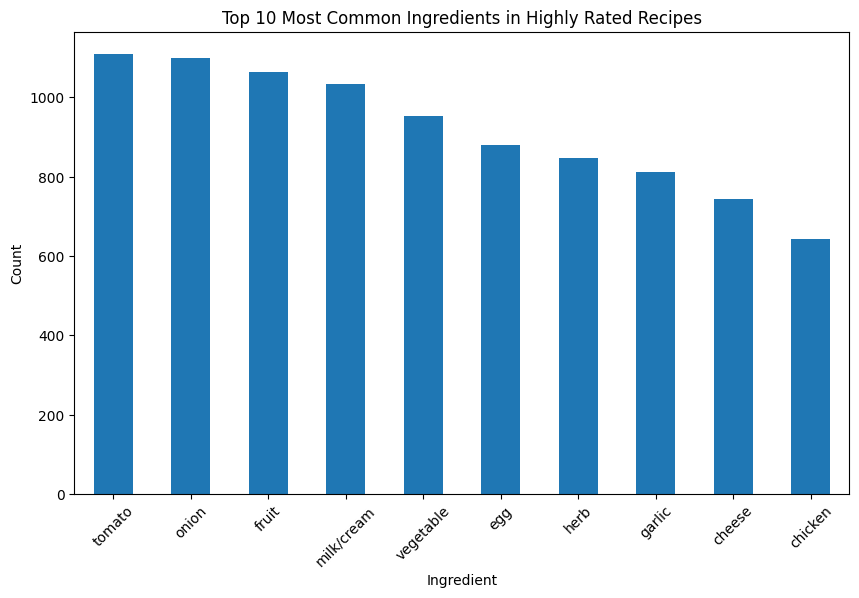

In [109]:
# 1. Most Common Ingredients in Highly Rated Recipes
high_rating_threshold = 4.0
ingredient_columns = df[Final_Categories['Ingredients']].columns
highly_rated_recipes = df[df['rating'] >= high_rating_threshold]
ingredient_sums = highly_rated_recipes[ingredient_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ingredient_sums.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Ingredients in Highly Rated Recipes')
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<a name='2.2'></a>
### 2.2 - Are there any correlations between preparation time and recipe ratings?

In [110]:
# Check if any column contains 'preparation' or 'time'
contains_preparation_or_time = df.columns[df.columns.str.contains('preparation|time', case=False)]

# Print the result
if not contains_preparation_or_time.empty:
    print(f'Columns containing "preparation" or "time": {contains_preparation_or_time.tolist()}')
else:
    print('No columns contain "preparation" or "time".')


No columns contain "preparation" or "time".


*But we know there is a column `22-minute meals`. Let's check the average ratings of 22-minute meals vs others:*

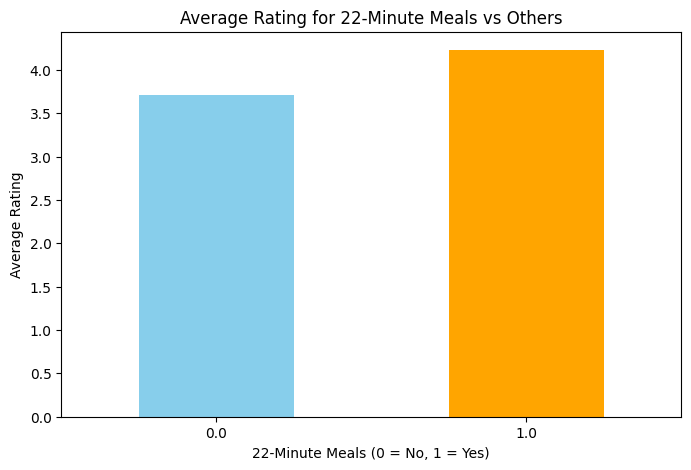

In [111]:
# Group by '22-minute meals' and calculate the average rating for each group
avg_rating_by_22_minute_meals = df.groupby('22-minute meals')['rating'].mean()

# Plot the results
plt.figure(figsize=(8, 5))
avg_rating_by_22_minute_meals.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Rating for 22-Minute Meals vs Others')
plt.xlabel('22-Minute Meals (0 = No, 1 = Yes)')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

<a name='2.3'></a>
### 2.3 - How can we recommend the top 10 quick, highly rated recipes that provide the best balance of high protein and calories?


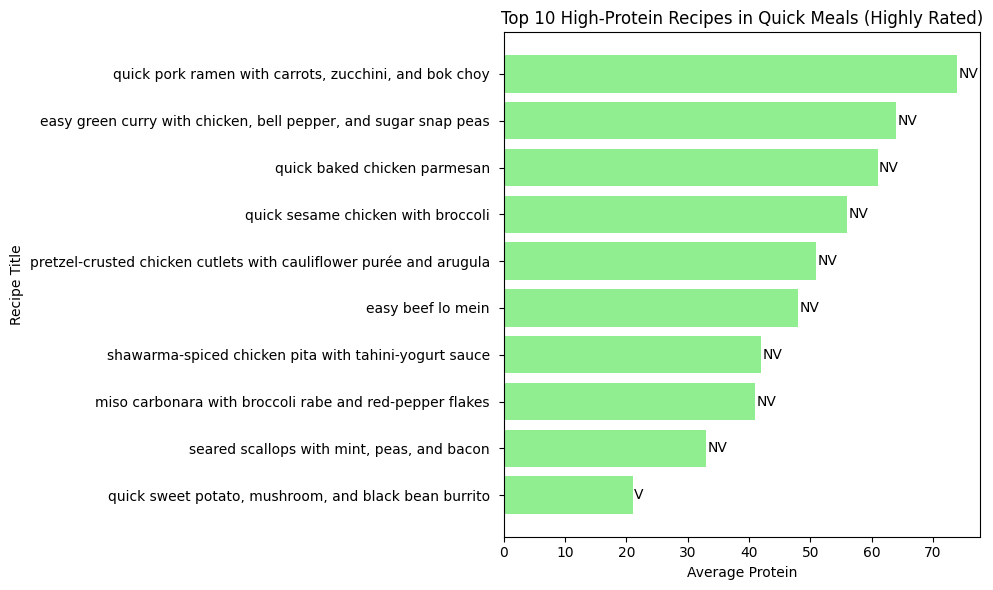

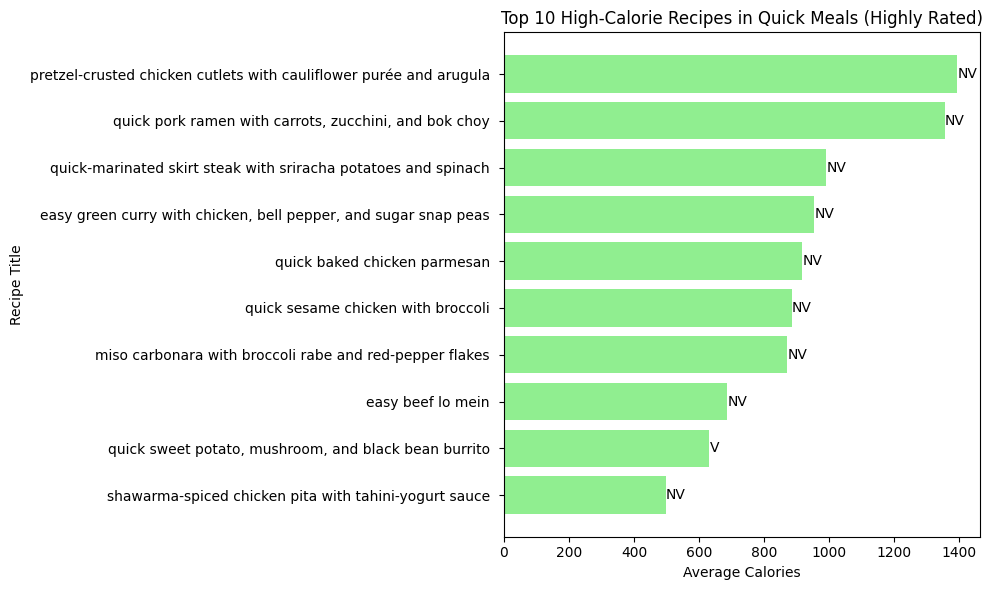

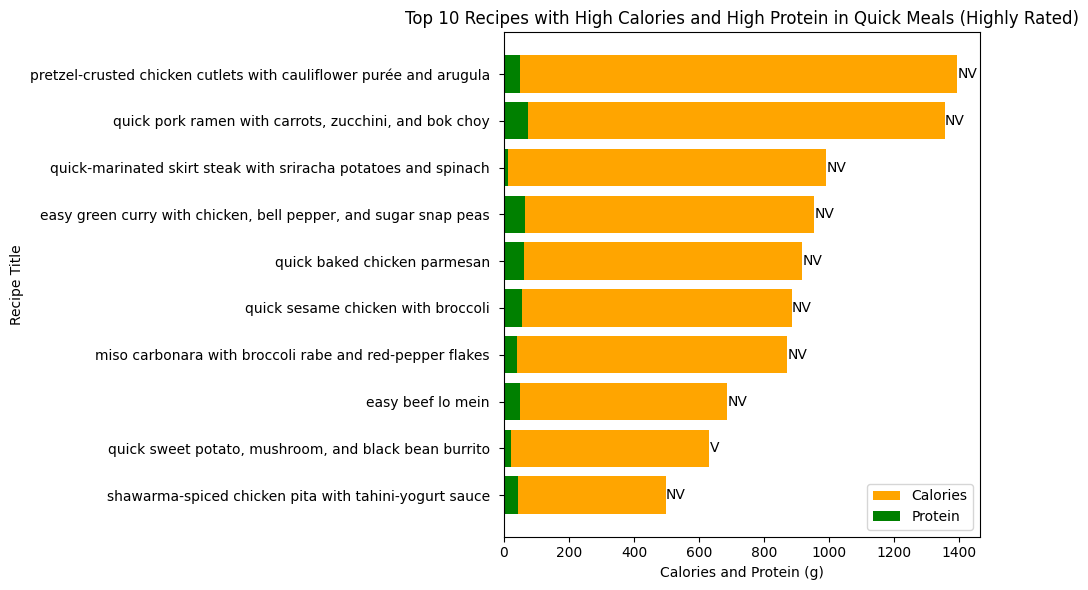

In [112]:
# Filter the recipes that are quick meals and highly rated
filtered_recipes = df[(df['22-minute meals'] == 1) & (df['rating'] > 4)]

# Calculate the average protein for each recipe
avg_protein_recipes = filtered_recipes.groupby(['title', 'vegetarian'])['protein_winsorized'].mean().reset_index()

# Sort the recipes by average protein in descending order
sorted_avg_protein = avg_protein_recipes.sort_values(by='protein_winsorized', ascending=False).head(10)

# Plot the top 10 recipes with the highest average protein
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_avg_protein['title'], sorted_avg_protein['protein_winsorized'], color='lightgreen')
plt.xlabel('Average Protein')
plt.ylabel('Recipe Title')
plt.title('Top 10 High-Protein Recipes in Quick Meals (Highly Rated)')
plt.gca().invert_yaxis()  # Highest protein content on top
plt.tight_layout()  # Ensure labels don't get cut off

# Add vegetarian mark
for i, bar in enumerate(bars):
    vegetarian_flag = sorted_avg_protein['vegetarian'].values[i]
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 'V' if vegetarian_flag == 1 else 'NV', va='center')

plt.show()

# Calculate the average calories for each recipe
avg_calories_recipes = filtered_recipes.groupby(['title', 'vegetarian'])['calories_winsorized'].mean().reset_index()

# Sort the recipes by average calories in descending order
sorted_avg_calories = avg_calories_recipes.sort_values(by='calories_winsorized', ascending=False).head(10)

# Plot the top 10 recipes with the highest average calories
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_avg_calories['title'], sorted_avg_calories['calories_winsorized'], color='lightgreen')
plt.xlabel('Average Calories')
plt.ylabel('Recipe Title')
plt.title('Top 10 High-Calorie Recipes in Quick Meals (Highly Rated)')
plt.gca().invert_yaxis()  # Highest calories content on top
plt.tight_layout()  # Ensure labels don't get cut off

# Add vegetarian mark
for i, bar in enumerate(bars):
    vegetarian_flag = sorted_avg_calories['vegetarian'].values[i]
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 'V' if vegetarian_flag == 1 else 'NV', va='center')

plt.show()

# Sort the recipes by both calories and protein in descending order
high_cal_protein_recipes = filtered_recipes.sort_values(by=['calories_winsorized', 'protein_winsorized'], ascending=False).head(10)

# Plot the top 10 recipes with the highest calories and protein
plt.figure(figsize=(10, 6))
bars_cal = plt.barh(high_cal_protein_recipes['title'], high_cal_protein_recipes['calories_winsorized'], color='orange', label='Calories')
bars_protein = plt.barh(high_cal_protein_recipes['title'], high_cal_protein_recipes['protein_winsorized'], color='green', label='Protein')
plt.xlabel('Calories and Protein (g)')
plt.ylabel('Recipe Title')
plt.title('Top 10 Recipes with High Calories and High Protein in Quick Meals (Highly Rated)')
plt.legend()
plt.gca().invert_yaxis()  # Highest values on top
plt.tight_layout()  # Ensure labels don't get cut off

# Add vegetarian mark
for i, bar in enumerate(bars_cal):
    vegetarian_flag = high_cal_protein_recipes['vegetarian'].values[i]
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 'V' if vegetarian_flag == 1 else 'NV', va='center')

plt.show()


<a name='2.4'></a>
### 2.4 - How can the data help to improve the user experience for a recipe platform?

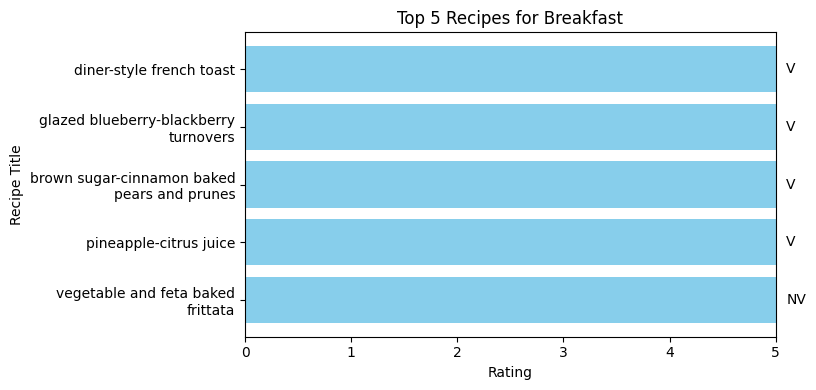

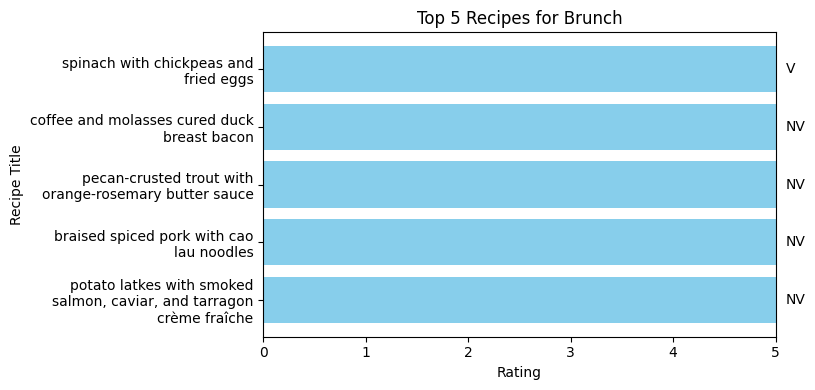

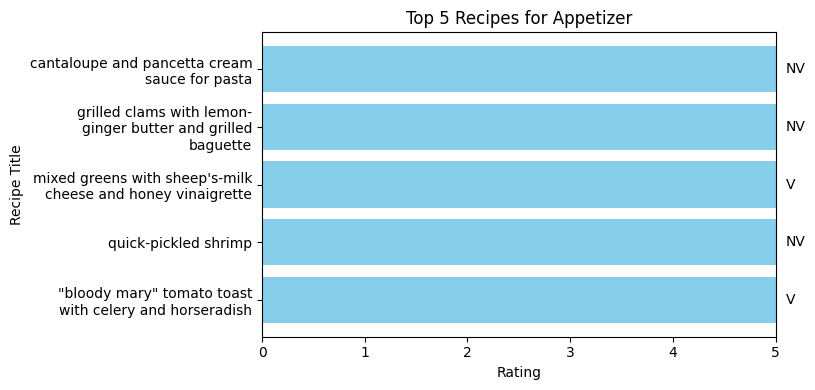

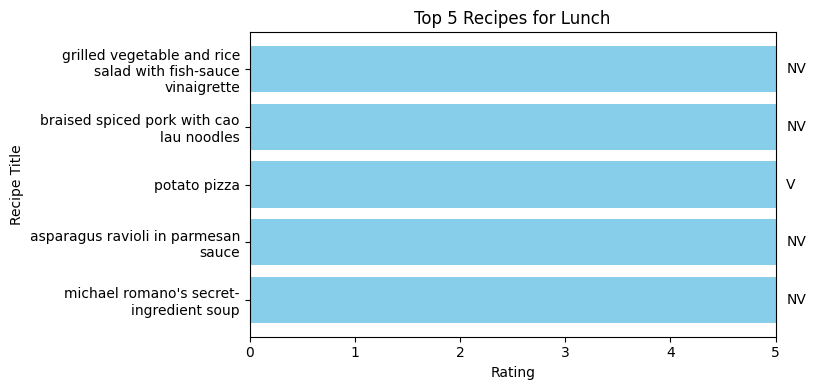

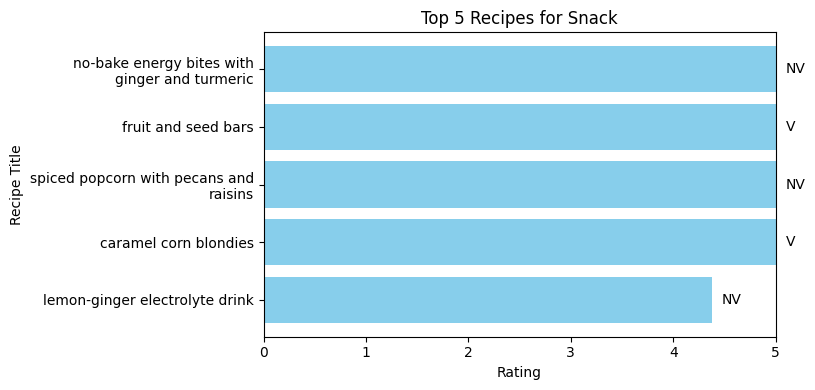

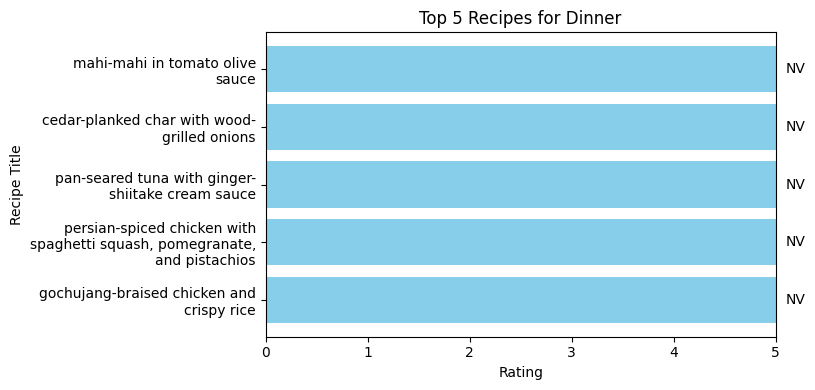

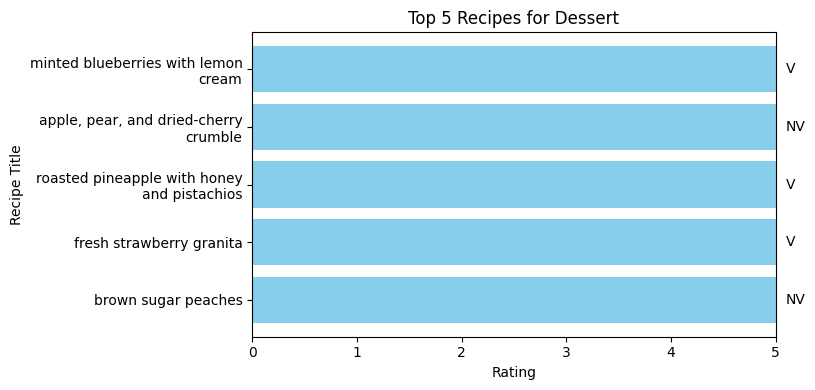

In [113]:
# List of meal types with binary columns
meal_types = ['breakfast', 'brunch', 'appetizer', 'lunch', 'snack', 'dinner', 'dessert']

# Function to recommend top-rated recipes for a specific meal type
def recommend_top_recipes_for_meal_type(meal_type, n_recommendations=5):
    # Filter recipes where the meal type column has a binary value of 1
    filtered_meal_df = df[df[meal_type] == 1]

    # Sort the filtered recipes by rating in descending order and select vegetarian column
    top_recipes = filtered_meal_df[['title', 'rating', 'vegetarian']].sort_values(by='rating', ascending=False).head(n_recommendations)

    # Wrap the recipe titles for better visualization
    top_recipes['title'] = top_recipes['title'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=30)))

    return top_recipes

# Set a standard x-axis limit for ratings (assuming rating scale is between 0 and 5)
rating_limit = (0, 5)

# Loop through each meal type and plot top-rated recipes
for meal_type in meal_types:
    top_recipes = recommend_top_recipes_for_meal_type(meal_type, 5)

    # Plot the top-rated recipes for each meal type with fixed figure size
    plt.figure(figsize=(8, 4))  # Fix the plot size
    bars = plt.barh(top_recipes['title'], top_recipes['rating'], color='skyblue')
    plt.xlabel('Rating')
    plt.ylabel('Recipe Title')
    plt.title(f'Top 5 Recipes for {meal_type.capitalize()}')
    plt.xlim(rating_limit)  # Set x-axis limit for consistent scaling
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
    plt.tight_layout()  # Adjust layout to avoid label cutoffs

    # Add vegetarian mark
    for i, bar in enumerate(bars):
        vegetarian_flag = top_recipes['vegetarian'].values[i]
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 'V' if vegetarian_flag == 1 else 'NV', va='center')

    plt.show()


<a name='2.5'></a>
### 2.5 - What types of recipes are low in calories/proteins/fat/sodium yet highly rated?

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


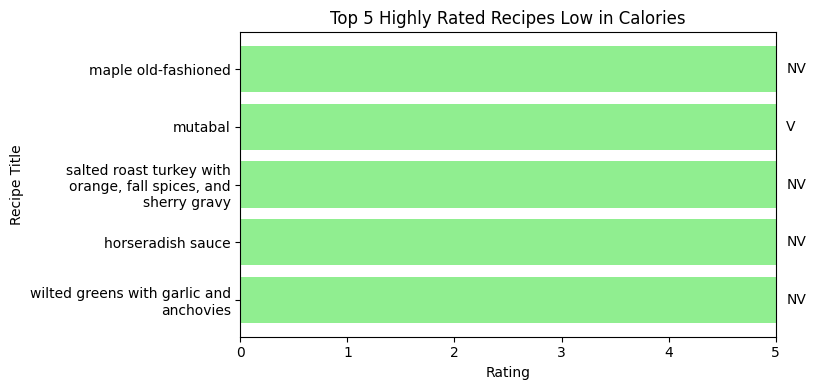

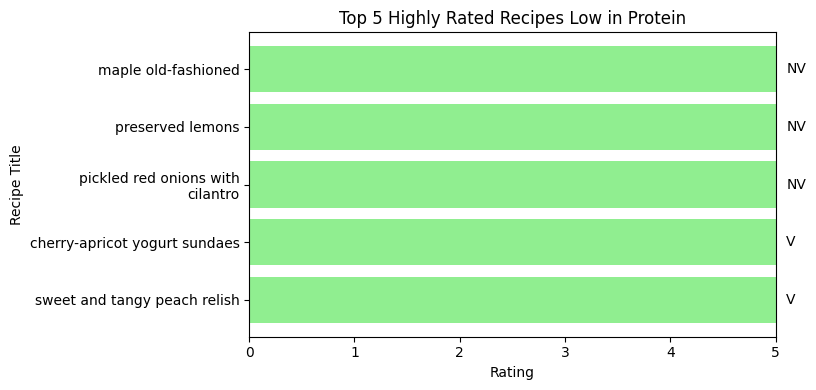

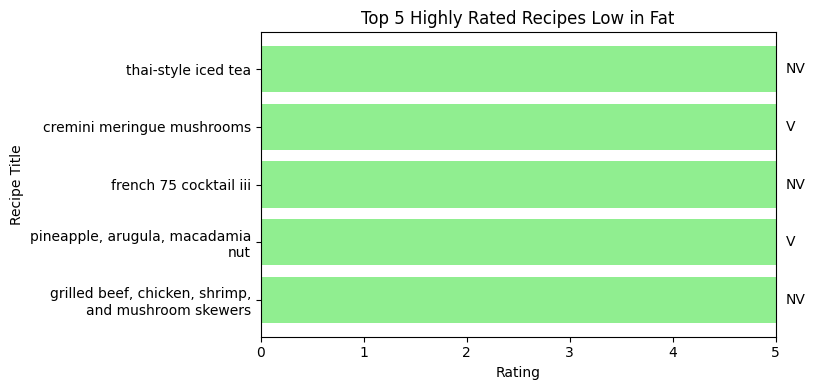

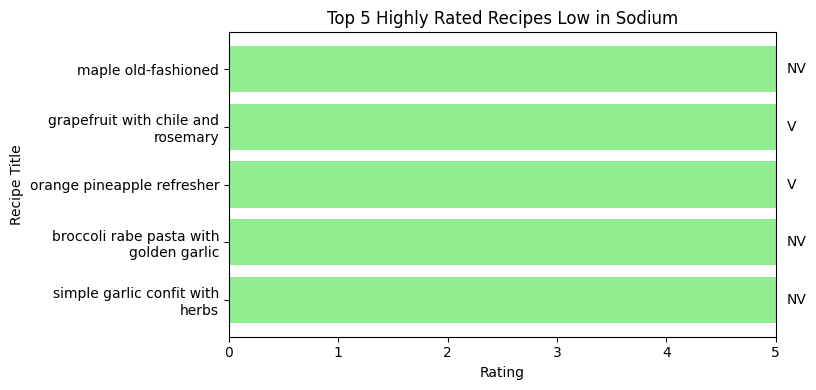

In [114]:
# Define the nutritional columns and rating threshold
nutritions = ['calories_winsorized', 'protein_winsorized', 'fat_winsorized', 'sodium_winsorized']
rating_threshold = 4

# Define a low nutrition threshold (below 25th percentile)
nutrition_thresholds = {nutrition: df[nutrition].quantile(0.25) for nutrition in nutritions}

# Function to find top 5 low nutrition, highly-rated recipes
def find_top_5_low_nutrition_high_rating(nutrition_column, nutrition_threshold, rating_threshold=4):
    # Filter for recipes that have low nutrition and high rating
    low_nutrition_high_rating = df[(df[nutrition_column] <= nutrition_threshold) & (df['rating'] > rating_threshold)]

    # Return the top 5 recipes by rating, including vegetarian status
    top_recipes = low_nutrition_high_rating[['title', nutrition_column, 'rating', 'vegetarian']].sort_values(by='rating', ascending=False).head(5)

    # Wrap long titles
    top_recipes['title'] = top_recipes['title'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=30)))

    return top_recipes

# Set a standard x-axis limit for ratings (assuming rating scale is between 0 and 5)
rating_limit = (0, 5)

# Loop through each nutrition column and create plots for top 5 recipes
for nutrition in nutritions:
    # Get the top 5 filtered DataFrame
    top_5_low_nutrition_recipes = find_top_5_low_nutrition_high_rating(nutrition, nutrition_thresholds[nutrition], rating_threshold)

    # Plot the top 5 low nutrition, highly-rated recipes with fixed figure size
    plt.figure(figsize=(8, 4))  # Fix the plot size
    bars = plt.barh(top_5_low_nutrition_recipes['title'], top_5_low_nutrition_recipes['rating'], color='lightgreen')
    plt.xlabel('Rating')
    plt.ylabel('Recipe Title')
    plt.title(f'Top 5 Highly Rated Recipes Low in {nutrition.split("_")[0].capitalize()}')
    plt.xlim(rating_limit)  # Set x-axis limit for consistent scaling
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
    plt.tight_layout()  # Adjust layout to avoid label cutoffs

    # Add vegetarian mark
    for i, bar in enumerate(bars):
        vegetarian_flag = top_5_low_nutrition_recipes['vegetarian'].values[i]
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 'V' if vegetarian_flag == 1 else 'NV', va='center')

    plt.show()


<a name='2.6'></a>
### 2.6 - What types of recipes are highly rated in occasion like Christmas?

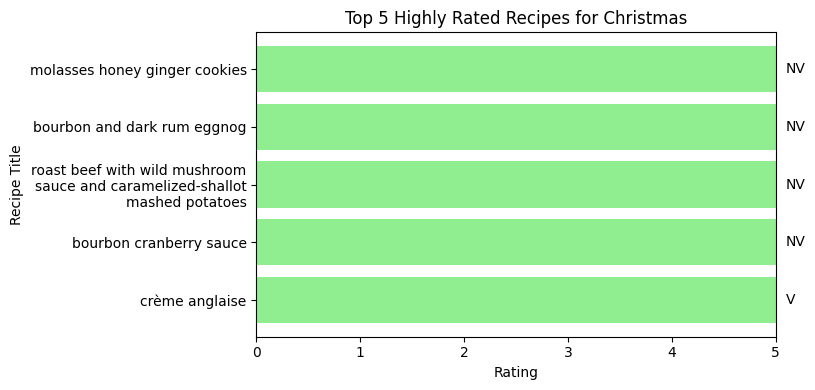

In [115]:
# Function to find top 5 highly rated recipes for a specific occasion/column
def find_top_5_high_rating_for_christmas(n_recommendations=5):
    # Filter recipes where 'christmas' column has a binary value of 1
    christmas_recipes = df[df['christmas'] == 1]

    # Sort the filtered recipes by rating in descending order
    top_christmas_recipes = christmas_recipes[['title', 'rating', 'vegetarian']].sort_values(by='rating', ascending=False).head(n_recommendations)

    return top_christmas_recipes

# Get the top 5 highly rated recipes for 'christmas'
top_5_christmas_recipes = find_top_5_high_rating_for_christmas()

# Set a standard x-axis limit for ratings (assuming rating scale is between 0 and 5)
rating_limit = (0, 5)

# Wrap the recipe titles to break long text into multiple lines
wrapped_titles = [textwrap.fill(title, width=30) for title in top_5_christmas_recipes['title']]

# Plot the top 5 highly rated Christmas recipes
plt.figure(figsize=(8, 4))
bars = plt.barh(wrapped_titles, top_5_christmas_recipes['rating'], color='lightgreen')
plt.xlabel('Rating')
plt.ylabel('Recipe Title')
plt.title('Top 5 Highly Rated Recipes for Christmas')
plt.xlim(rating_limit)  # Set x-axis limit for consistent scaling
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.tight_layout()  # Adjust layout to avoid label cutoffs

# Add vegetarian mark
for i, bar in enumerate(bars):
    vegetarian_flag = top_5_christmas_recipes['vegetarian'].values[i]
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 'V' if vegetarian_flag == 1 else 'NV', va='center')

plt.show()
